In [28]:
import numpy as np
import scipy
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import matplotlib
import math
import matplotlib.pyplot as plt

def linearFunc(x,intercept,slope):
    y = intercept + slope * x
    return y

# Experiment 4

In [29]:
wavelength_in_nm = np.array([405, 532, 635])
stopping_voltage = np.array([-1280, -520, -100]) # violet, green, red, in mV
K_max = -1/1000*stopping_voltage # max electron energy in eV
frequency = 3e8/(wavelength_in_nm*1e-9) # violet, green, red, in Hz
threshold_frequency = 4.62e14 # Hz

planck_constant = K_max / (frequency - threshold_frequency)
true_planck = 4.14e-15
print("Experimental Planck Constant: ", planck_constant)
print("Theoretical Planck Constant: ", true_planck)

Experimental Planck Constant:  [4.59208079e-15 5.10255275e-15 9.57767722e-15]
Theoretical Planck Constant:  4.14e-15


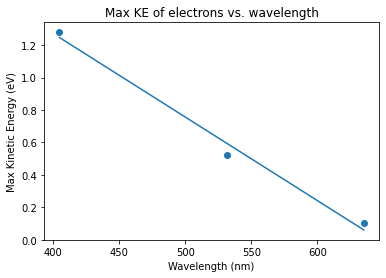

In [30]:
plt.scatter(wavelength_in_nm, K_max)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Max Kinetic Energy (eV)')
plt.title('Max KE of electrons vs. wavelength')

a_fit,cov=curve_fit(linearFunc,wavelength_in_nm,K_max)
inter = a_fit[0]
slope = a_fit[1]
yfit = inter + slope*wavelength_in_nm
plt.plot(wavelength_in_nm,yfit,label='Fit')

a. We use 405, 532, and 635 nm for violet, green, and red lasers respectively, all with +/- 1 nm error. We assume this error in wavelength due to the fact that the spread of the laser is much smaller than that of the LED

b. We measured cutoff frequencies of -1280, -520, -100 mV for violet, green, and red lasers respectively. The measurement uncertainty of the voltage is approximately +/- 20 mV, which we estimate due to the zero offset error from the phototube and the relative fluctuations of current that we observed.

c. The threshold voltage is given to us as 4.62e14. Since this is a given value, we assume the error is 0, as the actual error is likely to be something much much smaller than our own experimental error.

In [31]:
wavelength_err = 1e-9 # m
wavelength_in_m = wavelength_in_nm*1e-9 # m
frequency_err = 3e8*1/wavelength_in_m**2*wavelength_err # Hz
voltage_err = 20 # mV
K_max_err = 1/1000*voltage_err  # J

planck_err = planck_constant * np.sqrt((K_max_err/K_max)**2 + (frequency_err / frequency)**2) # error propagation
rounded_planck_err = ['{:0.2e}'.format(p) for p in planck_err]
print("Planck constant uncertainties (eV*s): ", rounded_planck_err) 
print("Work function uncertainties (eV): ", np.round(threshold_frequency*planck_err,3))

Planck constant uncertainties (eV*s):  ['7.26e-17', '1.96e-16', '1.92e-15']
Work function uncertainties (eV):  [0.034 0.091 0.885]


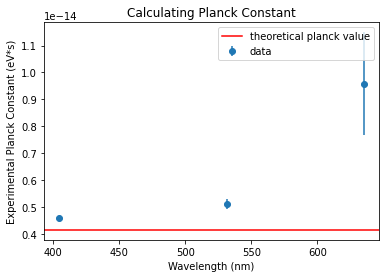

In [36]:
plt.errorbar(wavelength_in_nm, planck_constant, yerr=planck_err, fmt='o', label='data')
plt.axhline(y = true_planck, color = 'r', linestyle = '-', label='theoretical planck value')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Experimental Planck Constant (eV*s)')
plt.title('Calculating Planck Constant')
plt.legend()